<a href="https://colab.research.google.com/github/aarish7771/Deep_Learning/blob/main/Self_Organizing_Map_for_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Self Organizing Map

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the Dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#### Training the SOM

In [4]:
from minisom import MiniSom

In [5]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

#### Visualizing the results

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

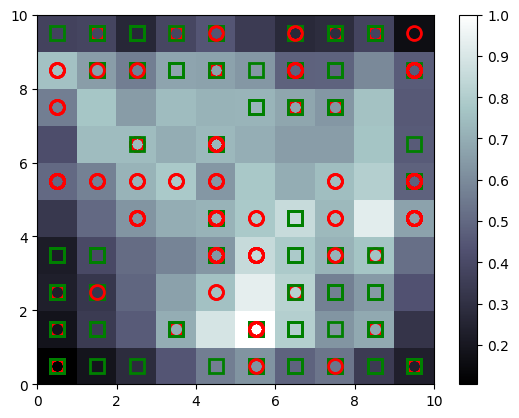

In [7]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#### Finding the frauds

In [8]:
mappings = som.win_map(X)
fraud_coords = [(5,1)]  # Coordinates you believe contain frauds
frauds = []

for coord in fraud_coords:
    if coord in mappings:
        frauds.append(mappings[coord])

frauds = np.concatenate(frauds, axis=0) if frauds else np.array([])

if len(frauds) > 0:
    frauds = sc.inverse_transform(frauds)
    fraud_ids = []
    for i in range(len(frauds)):
        fraud_ids.append(int(frauds[i, 0]))  # Assuming the first column is the Customer ID

    print("Fraud Customer IDs:")
    for fid in fraud_ids:
        print(fid)
else:
    print("No frauds found at the specified coordinates.")

Fraud Customer IDs:
15739548
15699839
15648069
15731586
15783883
15756538
15651868
15801473
15694666
15728523
15716082
15646594
15699238
15593959
15651460
15672637
15794204
15734008
15592999
15757434
15577771
15742009
15752344
15736533
15673907
15737909
15599272
15779207
15711299
15752578
15721504
15611682
